1. IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import warnings

import sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, roc_auc_score, accuracy_score, f1_score
)
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    precision_score, recall_score, confusion_matrix
)
from scipy.stats import uniform, randint
import joblib
import pickle


import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Seaborn version: {sns.__version__}")

Pandas version: 2.3.3
NumPy version: 2.3.3
Scikit-learn version: 1.7.2
Seaborn version: 0.13.2


2. LOAD DATASET

In [3]:
file_path = 'indian_microfinance_dataset_20k.xlsx'

df = pd.read_excel(file_path)

3. DATA EXPLORATION AND VISUALIZATION

In [4]:

# Display dataset overview
print("1. DataFrame Shape:", df.shape)


1. DataFrame Shape: (20000, 23)


In [5]:
print("2. Column Data Types:")
print(df.dtypes)


2. Column Data Types:
beneficiary_id          object
region                  object
household_size           int64
num_loans                int64
avg_loan_amount          int64
on_time_ratio          float64
avg_days_late          float64
max_dpd                  int64
num_defaults             int64
avg_kwh_30d            float64
var_kwh_30d            float64
seasonality_index      float64
avg_recharge_amount      int64
recharge_freq_30d        int64
last_recharge_days       int64
bill_on_time_ratio     float64
avg_bill_delay         float64
avg_bill_amount          int64
education_level         object
occupation              object
asset_score              int64
default_flag             int64
income_band             object
dtype: object


In [6]:
print("3. First 5 Rows:")
print(df.head())


3. First 5 Rows:
  beneficiary_id region  household_size  num_loans  avg_loan_amount  \
0     BEN_000001  Rural               4          1            11351   
1     BEN_000002  Urban               3          4            50080   
2     BEN_000003  Urban               6          1            49335   
3     BEN_000004  Rural               3          1             5681   
4     BEN_000005  Rural               3          3             2686   

   on_time_ratio  avg_days_late  max_dpd  num_defaults  avg_kwh_30d  ...  \
0          0.613            4.1       13             0         24.0  ...   
1          0.757            8.0       27             0         82.0  ...   
2          0.815            5.2        1             0         84.5  ...   
3          0.568           12.9       11             0         14.4  ...   
4          0.752            6.2        8             0          5.0  ...   

   recharge_freq_30d  last_recharge_days  bill_on_time_ratio  avg_bill_delay  \
0                  

In [7]:
print("4. Summary Statistics:")
print(df.describe().T)

4. Summary Statistics:
                       count          mean           std       min  \
household_size       20000.0      4.381950      1.563261     1.000   
num_loans            20000.0      2.265650      1.244812     1.000   
avg_loan_amount      20000.0  22047.414000  26010.767929  1238.000   
on_time_ratio        20000.0      0.697125      0.197210     0.039   
avg_days_late        20000.0      9.073100     12.295819     0.000   
max_dpd              20000.0     13.458600     14.478925     0.000   
num_defaults         20000.0      0.192100      0.444643     0.000   
avg_kwh_30d          20000.0     45.129360     67.760514     5.000   
var_kwh_30d          20000.0     15.178350     19.050502     0.600   
seasonality_index    20000.0      1.456227      0.426976     0.800   
avg_recharge_amount  20000.0    192.278000    230.807931    20.000   
recharge_freq_30d    20000.0      3.023250      1.762318     1.000   
last_recharge_days   20000.0      6.933150      6.624626     0.000 

In [8]:
print("5. Missing Values per Column:")
print(df.isnull().sum())

5. Missing Values per Column:
beneficiary_id         0
region                 0
household_size         0
num_loans              0
avg_loan_amount        0
on_time_ratio          0
avg_days_late          0
max_dpd                0
num_defaults           0
avg_kwh_30d            0
var_kwh_30d            0
seasonality_index      0
avg_recharge_amount    0
recharge_freq_30d      0
last_recharge_days     0
bill_on_time_ratio     0
avg_bill_delay         0
avg_bill_amount        0
education_level        0
occupation             0
asset_score            0
default_flag           0
income_band            0
dtype: int64


In [9]:
# Value counts for target variables
print("6. Default Flag Distribution:")
print(df['default_flag'].value_counts())

6. Default Flag Distribution:
default_flag
0    15115
1     4885
Name: count, dtype: int64


In [10]:
print("7. Income Band Distribution:")
print(df['income_band'].value_counts())

7. Income Band Distribution:
income_band
Medium      5000
High        5000
Very Low    5000
Low         5000
Name: count, dtype: int64


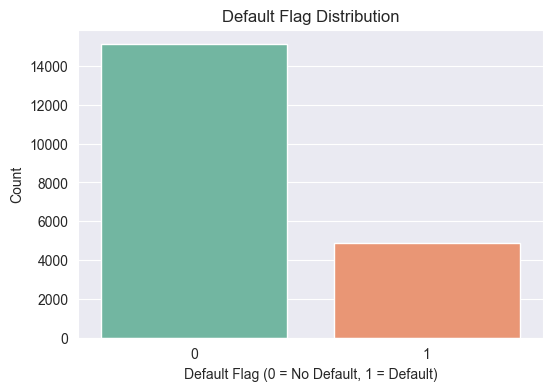

In [11]:
# Visualizations
# a) Default Flag distribution plot
plt.figure(figsize=(6,4))
sns.countplot(x='default_flag', data=df, palette='Set2')
plt.title('Default Flag Distribution')
plt.xlabel('Default Flag (0 = No Default, 1 = Default)')
plt.ylabel('Count')
plt.show()

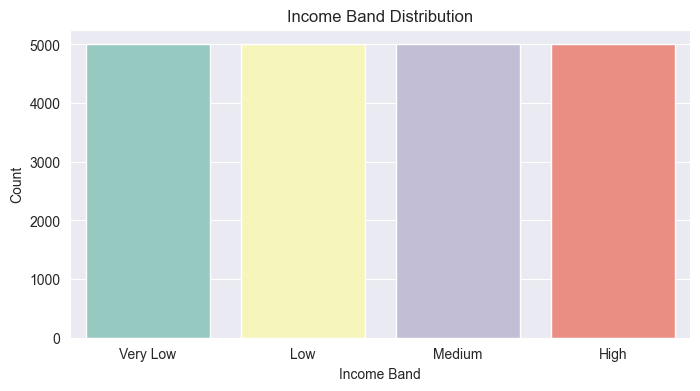

In [12]:
# b) Income Band distribution plot
plt.figure(figsize=(8,4))
sns.countplot(x='income_band', data=df, order=['Very Low','Low','Medium','High'], palette='Set3')
plt.title('Income Band Distribution')
plt.xlabel('Income Band')
plt.ylabel('Count')
plt.show()

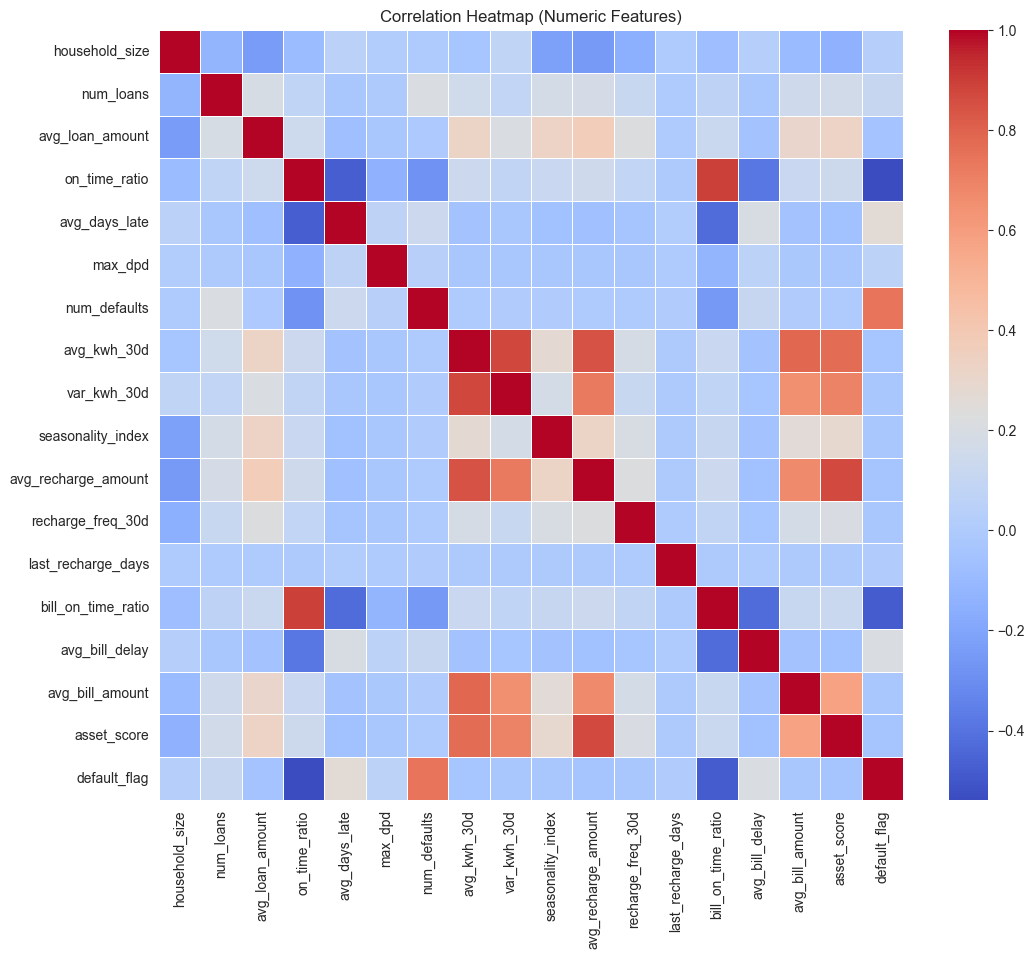

In [13]:
# c) Correlation heatmap of numeric features
plt.figure(figsize=(12,10))
numeric_cols = df.select_dtypes(include=['number']).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

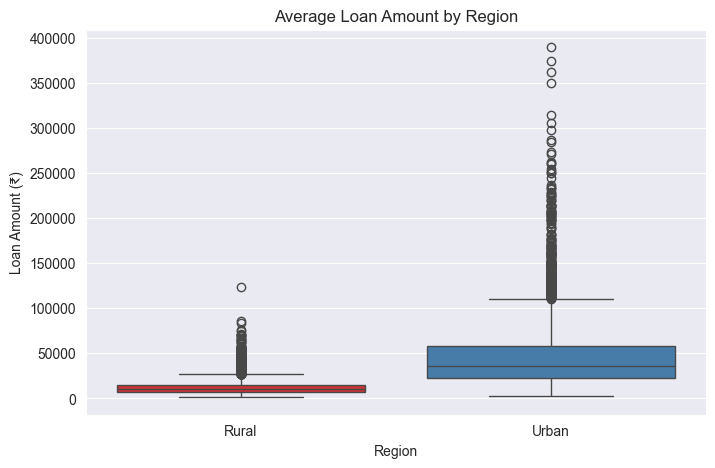

In [14]:
# d) Distribution of avg_loan_amount by region
plt.figure(figsize=(8,5))
sns.boxplot(x='region', y='avg_loan_amount', data=df, palette='Set1')
plt.title('Average Loan Amount by Region')
plt.xlabel('Region')
plt.ylabel('Loan Amount (₹)')
plt.show()

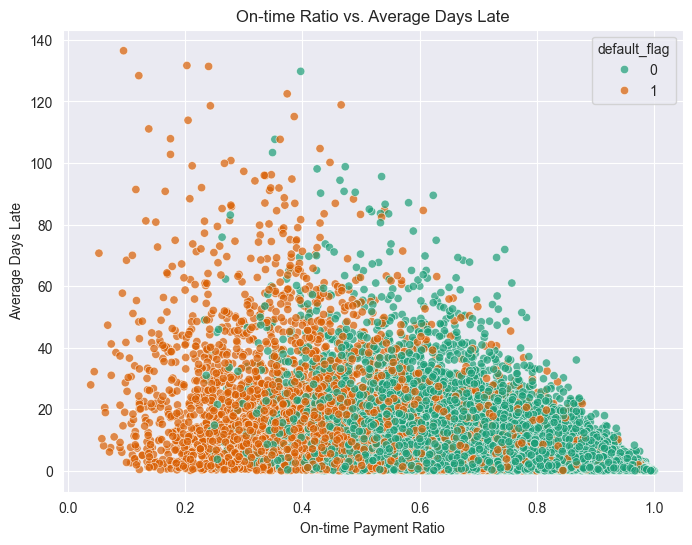

In [15]:
# e) Scatter plot: on_time_ratio vs avg_days_late colored by default_flag
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='on_time_ratio', y='avg_days_late',
    hue='default_flag', data=df, alpha=0.7, palette='Dark2'
)
plt.title('On-time Ratio vs. Average Days Late')
plt.xlabel('On-time Payment Ratio')
plt.ylabel('Average Days Late')
plt.show()

4. DATA PREPROCESSING AND CLEANING

In [16]:
# 4.1 Handle Missing Values (if any)
df_clean = df.copy()
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)  # Numeric imputation
df_clean.fillna(method='ffill', inplace=True)                     # Forward-fill for categoricals

In [17]:
# 4.2 Encode Categorical Variables

le_region = LabelEncoder()
df_clean['region_encoded'] = le_region.fit_transform(df_clean['region'])

le_edu = LabelEncoder()
df_clean['education_encoded'] = le_edu.fit_transform(df_clean['education_level'])

le_occ = LabelEncoder()
df_clean['occupation_encoded'] = le_occ.fit_transform(df_clean['occupation'])

le_income = LabelEncoder()
df_clean['income_band_encoded'] = le_income.fit_transform(df_clean['income_band'])


In [18]:
# 4.3 Create Derived Features
df_clean['loan_per_household'] = df_clean['avg_loan_amount'] / df_clean['household_size']
df_clean['kwh_per_household']  = df_clean['avg_kwh_30d'] / df_clean['household_size']
df_clean['recharge_intensity'] = df_clean['avg_recharge_amount'] / df_clean['recharge_freq_30d']
df_clean['payment_reliability'] = (df_clean['on_time_ratio'] + df_clean['bill_on_time_ratio']) / 2
df_clean['financial_stability'] = df_clean['asset_score'] / (df_clean['num_defaults'] + 1)

In [19]:
# 4.4 Remove or Cap Outliers (Example: cap avg_loan_amount at 99th percentile)
cap_value = df_clean['avg_loan_amount'].quantile(0.99)
df_clean['avg_loan_amount'] = df_clean['avg_loan_amount'].clip(upper=cap_value)

In [20]:
# 4.5 Normalize or Scale Features (fit later on training data)
numeric_features = [
    'household_size', 'num_loans', 'avg_loan_amount', 'on_time_ratio',
    'avg_days_late', 'max_dpd', 'num_defaults', 'avg_kwh_30d', 'var_kwh_30d',
    'seasonality_index', 'avg_recharge_amount', 'recharge_freq_30d',
    'last_recharge_days', 'bill_on_time_ratio', 'avg_bill_delay',
    'avg_bill_amount', 'asset_score', 'loan_per_household',
    'kwh_per_household', 'recharge_intensity', 'payment_reliability',
    'financial_stability'
]

In [21]:
scaler = StandardScaler()
df_clean[numeric_features] = df_clean[numeric_features].replace([np.inf, -np.inf], np.nan)

scaler.fit(df_clean[numeric_features])

# Save scaler
joblib.dump(scaler, "scaler.pkl")

print("✅ Scaler saved successfully!")

✅ Scaler saved successfully!


In [22]:
# Save preprocessed DataFrame for next steps
df_clean.to_csv('beneficiary_dataset_preprocessed.csv', index=False)

5. Basic Data Exploration & Visualization After Preprocessing

In [23]:
# Load preprocessed data
df_pre = pd.read_csv('beneficiary_dataset_preprocessed.csv')

5.1 Display basic info


In [24]:
df_pre.shape

(20000, 32)

In [25]:
df_pre.dtypes

beneficiary_id          object
region                  object
household_size           int64
num_loans                int64
avg_loan_amount        float64
on_time_ratio          float64
avg_days_late          float64
max_dpd                  int64
num_defaults             int64
avg_kwh_30d            float64
var_kwh_30d            float64
seasonality_index      float64
avg_recharge_amount      int64
recharge_freq_30d        int64
last_recharge_days       int64
bill_on_time_ratio     float64
avg_bill_delay         float64
avg_bill_amount          int64
education_level         object
occupation              object
asset_score              int64
default_flag             int64
income_band             object
region_encoded           int64
education_encoded        int64
occupation_encoded       int64
income_band_encoded      int64
loan_per_household     float64
kwh_per_household      float64
recharge_intensity     float64
payment_reliability    float64
financial_stability    float64
dtype: o

In [26]:
df_pre.head()

,beneficiary_id,region,household_size,num_loans,avg_loan_amount,on_time_ratio,avg_days_late,max_dpd,num_defaults,avg_kwh_30d,...,income_band,region_encoded,education_encoded,occupation_encoded,income_band_encoded,loan_per_household,kwh_per_household,recharge_intensity,payment_reliability,financial_stability
0,BEN_000001,Rural,4,1,11351.0,0.613,4.1,13,0,24.0,...,Medium,0,3,0,2,2837.750000,6.000000,98.000000,0.6050,0.0
1,BEN_000002,Urban,3,4,50080.0,0.757,8.0,27,0,82.0,...,High,1,1,2,0,16693.333333,27.333333,45.857143,0.7010,5.0
2,BEN_000003,Urban,6,1,49335.0,0.815,5.2,1,0,84.5,...,Medium,1,2,2,2,8222.500000,14.083333,19.750000,0.8080,1.0
3,BEN_000004,Rural,3,1,5681.0,0.568,12.9,11,0,14.4,...,Medium,0,0,3,2,1893.666667,4.800000,53.000000,0.5660,0.0
4,BEN_000005,Rural,3,3,2686.0,0.752,6.2,8,0,5.0,...,Very Low,0,2,1,3,895.333333,1.666667,23.166667,0.7885,0.0


In [27]:
df_pre.describe().T

,count,mean,std,min,25%,50%,75%,max
household_size,20000.0,4.381950,1.563261,1.0000,3.000000,4.000000,5.000000,8.0000
num_loans,20000.0,2.265650,1.244812,1.0000,1.000000,2.000000,3.000000,7.0000
avg_loan_amount,20000.0,21572.615900,22974.193673,1238.0000,7938.500000,13148.000000,25206.750000,129975.1600
on_time_ratio,20000.0,0.697125,0.197210,0.0390,0.566750,0.728000,0.857000,1.0000
avg_days_late,20000.0,9.073100,12.295819,0.0000,1.600000,4.700000,11.500000,136.5000
max_dpd,20000.0,13.458600,14.478925,0.0000,3.000000,9.000000,18.000000,166.0000
num_defaults,20000.0,0.192100,0.444643,0.0000,0.000000,0.000000,0.000000,4.0000
avg_kwh_30d,20000.0,45.129360,67.760514,5.0000,9.600000,22.800000,47.700000,500.0000
var_kwh_30d,20000.0,15.178350,19.050502,0.6000,3.900000,9.200000,18.400000,231.6000
seasonality_index,20000.0,1.456227,0.426976,0.8000,1.160000,1.400000,1.680000,3.5000


5.2 Re-check target distributions

In [28]:
print("Default Flag Distribution:\n", df_pre['default_flag'].value_counts())

Default Flag Distribution:
 default_flag
0    15115
1     4885
Name: count, dtype: int64


In [29]:
print("Income Band Distribution:\n", df_pre['income_band'].value_counts())

Income Band Distribution:
 income_band
Medium      5000
High        5000
Very Low    5000
Low         5000
Name: count, dtype: int64


5.3 Visualizations

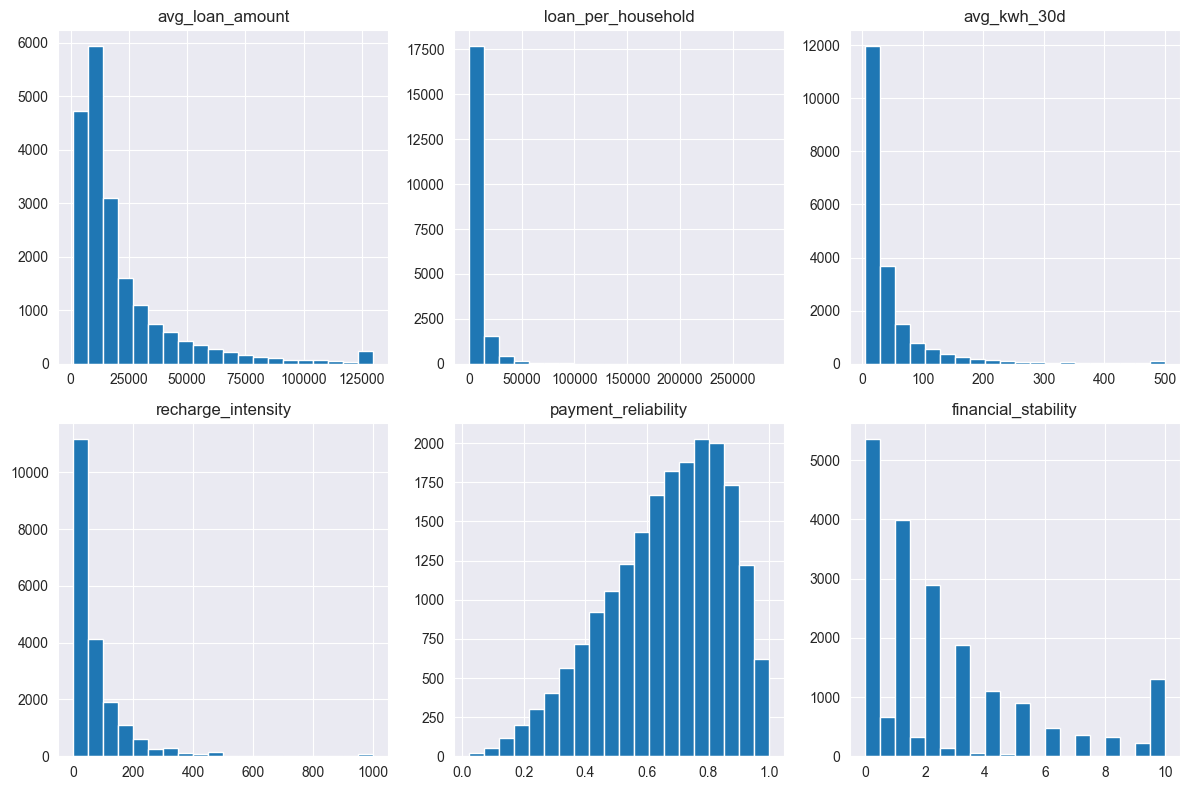

In [30]:
# a) Histogram of composite numeric feature distributions
numeric_feats = [
    'avg_loan_amount', 'loan_per_household', 'avg_kwh_30d',
    'recharge_intensity', 'payment_reliability', 'financial_stability'
]
df_pre[numeric_feats].hist(bins=20, figsize=(12, 8), layout=(2, 3))
plt.tight_layout()
plt.show()

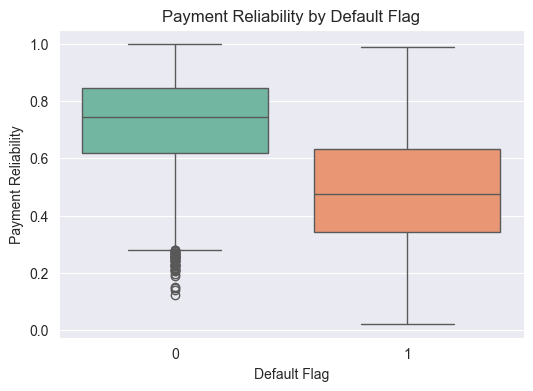

In [31]:
# b) Boxplot: payment_reliability by default_flag
plt.figure(figsize=(6, 4))
sns.boxplot(x='default_flag', y='payment_reliability', data=df_pre, palette='Set2')
plt.title('Payment Reliability by Default Flag')
plt.xlabel('Default Flag')
plt.ylabel('Payment Reliability')
plt.show()

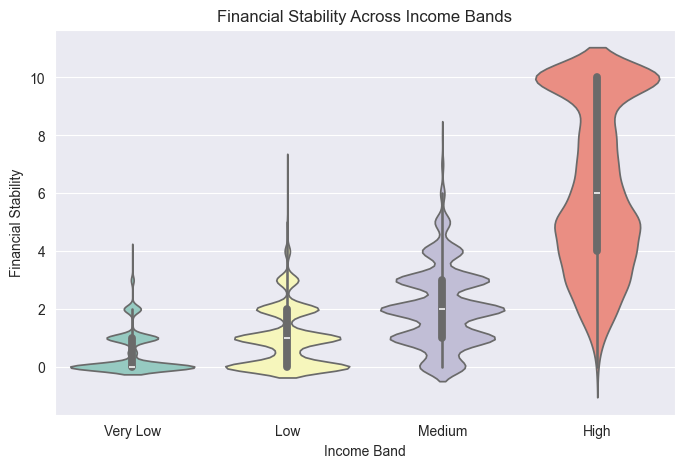

In [32]:
# c) Violin plot: financial_stability vs income_band
plt.figure(figsize=(8, 5))
sns.violinplot(x='income_band', y='financial_stability', data=df_pre,
               order=['Very Low','Low','Medium','High'], palette='Set3')
plt.title('Financial Stability Across Income Bands')
plt.xlabel('Income Band')
plt.ylabel('Financial Stability')
plt.show()

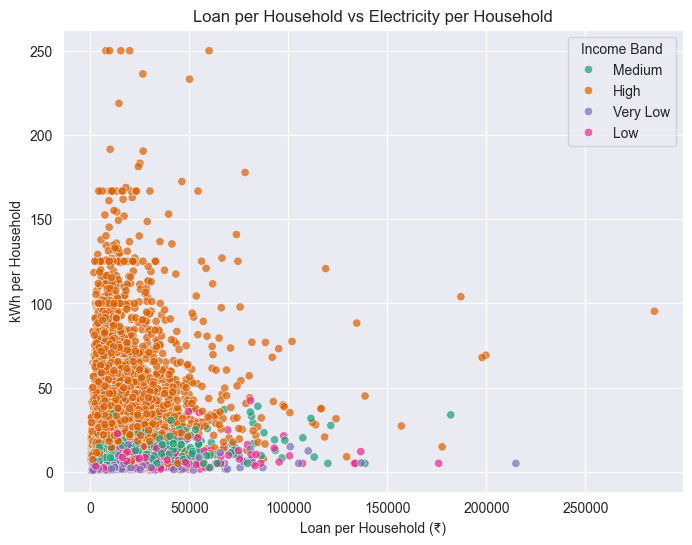

In [33]:
# d) Scatter: loan_per_household vs kwh_per_household colored by income_band
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='loan_per_household',
    y='kwh_per_household',
    hue='income_band',
    data=df_pre,
    palette='Dark2',
    alpha=0.7
)
plt.title('Loan per Household vs Electricity per Household')
plt.xlabel('Loan per Household (₹)')
plt.ylabel('kWh per Household')
plt.legend(title='Income Band')
plt.show()

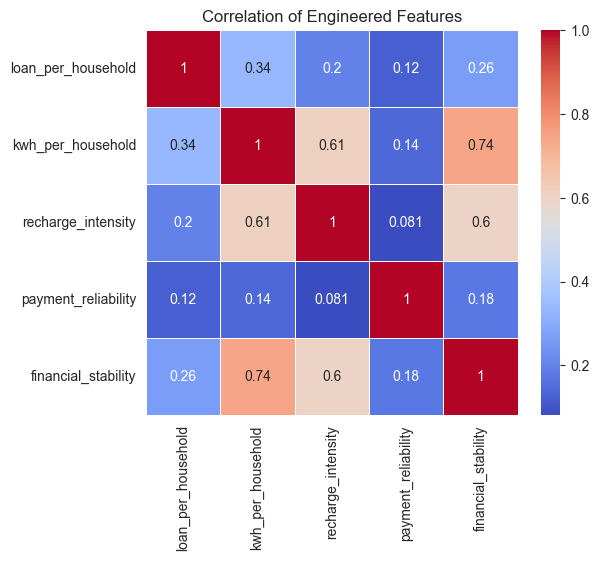

In [34]:
# e) Correlation heatmap of engineered features
eng_feats = ['loan_per_household', 'kwh_per_household',
             'recharge_intensity', 'payment_reliability', 'financial_stability']
plt.figure(figsize=(6, 5))
sns.heatmap(df_pre[eng_feats].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Engineered Features')
plt.show()

6: Selecting and Initializing the ML Model for RISK PREDICTION

In [35]:
# For default risk prediction (binary classification), we'll compare:
#   1. Logistic Regression
#   2. Random Forest
#   3. Gradient Boosting

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize models with balanced class weights and consistent random state
models = {
    'Logistic Regression': LogisticRegression(
        random_state=42, class_weight='balanced', max_iter=1000
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100, random_state=42, class_weight='balanced'
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100, random_state=42
    )
}

# Display initialized models
for name, model in models.items():
    print(f"{name}: {model}")

Logistic Regression: LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
Random Forest: RandomForestClassifier(class_weight='balanced', random_state=42)
Gradient Boosting: GradientBoostingClassifier(random_state=42)


6.1 TRAINING AND EVALUATING

In [36]:
features_default = [
    'region_encoded', 'household_size', 'num_loans', 'avg_loan_amount',
    'on_time_ratio', 'avg_days_late', 'max_dpd', 'avg_kwh_30d',
    'var_kwh_30d', 'seasonality_index', 'avg_recharge_amount',
    'recharge_freq_30d', 'last_recharge_days', 'bill_on_time_ratio',
    'avg_bill_delay', 'avg_bill_amount', 'education_encoded',
    'occupation_encoded', 'asset_score', 'loan_per_household',
    'payment_reliability', 'financial_stability'
]

# Prepare data
X = df_clean[features_default]
y = df_clean['default_flag']

In [37]:
# Splitting into 80% train, 10% validation, 10% test

# First split off 20% for temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# Then split temp into equal validation and test sets (10% each of original data)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,    # half of 20% = 10% of total
    random_state=42,
    stratify=y_temp
)

In [38]:
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X):.0%})")

Training set: 16000 samples (80%)


In [39]:
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X):.0%})")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X):.0%})")

Validation set: 2000 samples (10%)
Testing set: 2000 samples (10%)


In [40]:
# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [41]:
X_train_scaled

array([[-0.65358224, -0.2451828 , -1.01699579, ..., -0.31365436,
         1.13610661, -0.50984787],
       [-0.65358224,  1.03577225,  0.58860218, ..., -0.43885532,
         1.05069625, -0.15674419],
       [-0.65358224,  1.03577225, -1.01699579, ..., -0.45729254,
         0.79705336,  0.19635948],
       ...,
       [-0.65358224,  1.03577225, -0.2141968 , ..., -0.51603338,
         0.05424205, -0.86295155],
       [-0.65358224, -1.52613785,  0.58860218, ...,  0.12300513,
        -1.3847931 , -0.86295155],
       [-0.65358224, -0.88566033, -1.01699579, ..., -0.45372979,
         0.20694542, -0.50984787]], shape=(16000, 22))

In [42]:
X_val_scaled

array([[-0.65358224,  1.67624977, -1.01699579, ..., -0.38722514,
         0.26388566, -0.50984787],
       [-0.65358224, -0.88566033, -0.2141968 , ..., -0.51109006,
         1.41563142, -0.86295155],
       [ 1.53002934, -0.88566033, -1.01699579, ..., -0.00307167,
         1.03516709,  1.60877419],
       ...,
       [-0.65358224, -0.2451828 ,  2.19420014, ..., -0.45988296,
         1.10763649, -0.86295155],
       [ 1.53002934, -0.88566033, -0.2141968 , ...,  1.82438132,
        -0.67304011,  2.66808522],
       [ 1.53002934, -0.2451828 ,  2.99699912, ...,  0.76708344,
         0.59517433, -0.50984787]], shape=(2000, 22))

In [43]:
X_test_scaled

array([[-0.65358224, -0.2451828 , -0.2141968 , ..., -0.45269066,
         1.43892515, -0.86295155],
       [ 1.53002934,  1.03577225, -1.01699579, ..., -0.23334405,
        -0.4271618 ,  2.66808522],
       [-0.65358224,  1.03577225, -1.01699579, ..., -0.41845857,
        -2.41230561, -0.86295155],
       ...,
       [ 1.53002934, -1.52613785, -1.01699579, ...,  2.63901884,
         0.93681577,  0.19635948],
       [-0.65358224,  1.67624977, -1.01699579, ..., -0.49370045,
         0.52529312,  0.19635948],
       [-0.65358224, -0.88566033, -1.01699579, ...,  0.05892017,
        -2.42783477, -0.50984787]], shape=(2000, 22))

In [44]:
# Optionally, convert back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features_default, index=X_train.index)
X_val_scaled   = pd.DataFrame(X_val_scaled,   columns=features_default, index=X_val.index)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=features_default, index=X_test.index)


In [45]:
X_train_scaled

,region_encoded,household_size,num_loans,avg_loan_amount,on_time_ratio,avg_days_late,max_dpd,avg_kwh_30d,var_kwh_30d,seasonality_index,...,last_recharge_days,bill_on_time_ratio,avg_bill_delay,avg_bill_amount,education_encoded,occupation_encoded,asset_score,loan_per_household,payment_reliability,financial_stability
7792,-0.653582,-0.245183,-1.016996,-0.380912,1.019107,-0.404923,-0.242251,-0.593565,-0.673330,-0.088526,...,0.319925,1.190160,-0.650157,-0.577458,1.131251,-0.261010,-0.563790,-0.313654,1.136107,-0.509848
12753,-0.653582,1.035772,0.588602,-0.469709,1.024189,0.005687,0.097357,-0.304028,-0.074273,-0.904864,...,0.168355,1.020451,-0.070363,-0.514710,0.187313,-1.176833,-0.229234,-0.438855,1.050696,-0.156744
7459,-0.653582,1.035772,-1.016996,-0.524037,0.648091,-0.573998,1.931245,-0.368696,-0.194084,-0.998159,...,2.896600,0.900657,0.166826,1.358765,-0.756625,-1.176833,0.105322,-0.457293,0.797053,0.196359
7681,-0.653582,0.395295,2.194200,-0.244960,-2.081163,2.461294,-0.310173,-0.593565,-0.595192,-0.811568,...,1.835616,-1.699873,6.228310,0.456389,0.187313,0.654814,-0.898346,-0.315329,-1.941255,-0.862952
11064,-0.653582,1.676250,0.588602,-0.534229,0.200839,-0.445179,-0.921469,-0.062992,-0.147201,-0.205146,...,-0.134783,-0.926203,0.377660,-0.463914,0.187313,-1.176833,-0.898346,-0.480480,-0.377986,-0.862952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13003,-0.653582,0.395295,0.588602,-0.581996,-1.151082,0.939622,-0.038486,-0.221723,-0.141992,-0.974835,...,0.623063,-1.070954,0.535786,-0.577458,0.187313,-0.261010,-0.563790,-0.452584,-1.141503,-0.686400
12591,-0.653582,1.035772,-0.214197,-0.473383,0.851387,-0.549844,-0.242251,-0.523018,-0.438916,-0.671624,...,0.016786,0.840760,-0.781928,0.253205,-0.756625,-1.176833,-0.898346,-0.440102,0.869523,-0.862952
284,-0.653582,1.035772,-0.214197,-0.697126,-0.414133,0.013738,-0.310173,-0.593565,-0.688958,0.937727,...,0.471494,0.511326,-0.492031,-0.577458,1.131251,-1.176833,-0.898346,-0.516033,0.054242,-0.862952
212,-0.653582,-1.526138,0.588602,-0.232143,-1.552593,-0.107030,1.184106,-0.593565,-0.746259,0.914403,...,-0.892628,-1.145825,0.746620,-0.577458,1.131251,-0.261010,-0.898346,0.123005,-1.384793,-0.862952


In [46]:
X_val_scaled

,region_encoded,household_size,num_loans,avg_loan_amount,on_time_ratio,avg_days_late,max_dpd,avg_kwh_30d,var_kwh_30d,seasonality_index,...,last_recharge_days,bill_on_time_ratio,avg_bill_delay,avg_bill_amount,education_encoded,occupation_encoded,asset_score,loan_per_household,payment_reliability,financial_stability
18131,-0.653582,1.676250,-1.016996,-0.213640,0.510866,-0.670612,-0.853547,-0.593565,-0.668121,0.541220,...,-0.741059,0.007193,-0.518385,0.002214,0.187313,0.654814,-0.563790,-0.387225,0.263886,-0.509848
17437,-0.653582,-0.885660,-0.214197,-0.811862,1.252898,-0.686714,-0.785626,-0.365757,-0.569146,0.377953,...,2.290323,1.499628,-0.571094,-0.577458,0.187313,-1.176833,-0.898346,-0.511090,1.415631,-0.862952
15142,1.530029,-0.885660,-1.016996,-0.063385,1.288474,-0.662561,-0.717704,1.008443,-0.027390,1.427530,...,-1.044198,0.730949,-0.175780,0.351809,0.187313,0.654814,1.443547,-0.003072,1.035167,1.608774
1074,1.530029,0.395295,-1.016996,4.325515,-0.470039,-0.606202,-0.174330,0.921729,1.134261,0.704488,...,-1.044198,-0.322241,0.061409,0.148625,-1.700564,1.570637,1.443547,1.545958,-0.406456,1.608774
3621,-0.653582,0.395295,1.391401,-0.479463,-0.388721,0.722241,-0.038486,-0.392212,-0.522264,-0.018554,...,-1.044198,-0.706580,-0.281197,-0.577458,-1.700564,-0.261010,-0.898346,-0.410828,-0.564336,-0.862952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,1.530029,-1.526138,2.194200,0.088183,1.125837,-0.694765,-0.785626,2.836790,1.644762,0.564544,...,-0.134783,0.701000,-0.439323,2.840812,0.187313,0.654814,2.447215,0.449130,0.936816,2.668085
6527,1.530029,-0.885660,-0.214197,0.995751,0.734492,-0.557895,-0.785626,0.016374,-0.043018,1.147642,...,-0.741059,-0.192464,0.588494,0.988253,-1.700564,0.654814,0.105322,0.715802,0.274238,0.196359
5101,-0.653582,-0.245183,2.194200,-0.668168,1.313886,-0.533742,-0.785626,-0.593565,-0.600402,-0.904864,...,-0.741059,0.845752,-0.412968,-0.577458,1.131251,-1.176833,-0.898346,-0.459883,1.107636,-0.862952
3573,1.530029,-0.885660,-0.214197,2.629051,-0.764819,-0.485435,-0.174330,1.700687,1.665599,0.657840,...,-0.892628,-0.546855,0.140472,1.995208,1.131251,0.654814,2.447215,1.824381,-0.673040,2.668085


In [50]:
X_test_scaled

,region_encoded,household_size,num_loans,avg_loan_amount,on_time_ratio,avg_days_late,max_dpd,avg_kwh_30d,var_kwh_30d,seasonality_index,...,last_recharge_days,bill_on_time_ratio,avg_bill_delay,avg_bill_amount,education_encoded,occupation_encoded,asset_score,loan_per_household,payment_reliability,financial_stability
17298,-0.653582,-0.245183,-0.214197,-0.654040,1.476524,-0.718919,-0.649782,-0.593565,-0.709795,-0.438385,...,0.016786,1.324928,-0.755574,-0.114318,1.131251,-1.176833,-0.898346,-0.452691,1.438925,-0.862952
5283,1.530029,1.035772,-1.016996,0.135862,-0.190507,-0.437128,0.097357,4.334447,5.572496,1.637445,...,1.532477,-0.636700,1.510894,3.079851,-0.756625,1.570637,2.447215,-0.233344,-0.427162,2.668085
11800,-0.653582,1.035772,-1.016996,-0.409607,-2.558910,-0.284156,-0.378095,-0.567110,-0.537891,-1.534610,...,-0.134783,-2.139118,2.117042,-0.577458,1.131251,1.570637,-0.898346,-0.418459,-2.412306,-0.862952
15922,-0.653582,-0.885660,-1.016996,-0.635187,-0.876632,-0.573998,-0.853547,-0.593565,-0.720213,-0.904864,...,-0.741059,-1.080937,-0.202134,-0.448974,1.131251,-0.261010,-0.898346,-0.391174,-1.006917,-0.862952
3613,1.530029,-0.885660,-1.016996,0.956296,-0.825808,-0.300258,0.436966,0.707148,0.936311,1.147642,...,-0.741059,-1.031022,-0.650157,-0.577458,1.131251,-0.261010,1.778103,0.689022,-0.955153,1.961878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6562,-0.653582,-0.245183,-0.214197,-0.654258,0.353311,-0.002365,-0.717704,-0.342241,-0.464962,0.028094,...,-0.134783,0.176901,-0.650157,0.023130,0.187313,-1.176833,-0.229234,-0.452802,0.271650,-0.156744
16120,1.530029,0.395295,0.588602,3.280814,1.151249,-0.525691,-0.921469,0.752710,0.394555,-0.345089,...,-0.437921,1.225099,-0.755574,0.486269,0.187313,0.654814,1.108991,1.120513,1.221517,1.255671
19971,1.530029,-1.526138,-1.016996,2.239131,0.622679,-0.606202,0.980340,-0.195268,-0.240967,-0.135174,...,-0.286352,1.195151,0.140472,-0.577458,1.131251,1.570637,0.105322,2.639019,0.936816,0.196359
5546,-0.653582,1.676250,-1.016996,-0.579677,0.368558,-0.082876,0.504888,-0.058583,0.082003,0.261333,...,2.745030,0.651086,-0.571094,-0.577458,-1.700564,-0.261010,0.105322,-0.493700,0.525293,0.196359


In [51]:
# Save scaler for later use
joblib.dump(scaler, 'default_feature_scaler.pkl')

['default_feature_scaler.pkl']

In [52]:
print("Scaled feature means (train):")
print(X_train_scaled.mean().round(2))

print("\nScaled feature std devs (train):")
print(X_train_scaled.std().round(2))

Scaled feature means (train):
region_encoded         0.0
household_size        -0.0
num_loans              0.0
avg_loan_amount        0.0
on_time_ratio         -0.0
avg_days_late         -0.0
max_dpd               -0.0
avg_kwh_30d            0.0
var_kwh_30d            0.0
seasonality_index      0.0
avg_recharge_amount    0.0
recharge_freq_30d      0.0
last_recharge_days     0.0
bill_on_time_ratio     0.0
avg_bill_delay        -0.0
avg_bill_amount       -0.0
education_encoded      0.0
occupation_encoded     0.0
asset_score           -0.0
loan_per_household     0.0
payment_reliability   -0.0
financial_stability    0.0
dtype: float64

Scaled feature std devs (train):
region_encoded         1.0
household_size         1.0
num_loans              1.0
avg_loan_amount        1.0
on_time_ratio          1.0
avg_days_late          1.0
max_dpd                1.0
avg_kwh_30d            1.0
var_kwh_30d            1.0
seasonality_index      1.0
avg_recharge_amount    1.0
recharge_freq_30d      1.0
las

In [53]:
# Models dictionary
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train on scaled training data for Logistic Regression, else unscaled
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        X_val_input = X_val_scaled
    else:
        model.fit(X_train, y_train)
        X_val_input = X_val

    # Predict on validation set
    y_val_pred = model.predict(X_val_input)
    y_val_proba = model.predict_proba(X_val_input)[:,1]

    # Evaluate
    accuracy = accuracy_score(y_val, y_val_pred)
    auc = roc_auc_score(y_val, y_val_proba)
    report = classification_report(y_val, y_val_pred)

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc': auc,
        'classification_report': report,
        'predictions': y_val_pred,
        'probabilities': y_val_proba
    }

    print(f"Validation Accuracy: {accuracy:.4f}")
    print(f"Validation AUC: {auc:.4f}")
    print(f"Classification Report:\n{report}")


Training Logistic Regression...
Validation Accuracy: 0.8880
Validation AUC: 0.9557
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1511
           1       0.73      0.86      0.79       489

    accuracy                           0.89      2000
   macro avg       0.84      0.88      0.86      2000
weighted avg       0.90      0.89      0.89      2000


Training Random Forest...
Validation Accuracy: 0.8910
Validation AUC: 0.9520
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1511
           1       0.86      0.66      0.75       489

    accuracy                           0.89      2000
   macro avg       0.88      0.81      0.84      2000
weighted avg       0.89      0.89      0.89      2000


Training Gradient Boosting...
Validation Accuracy: 0.9190
Validation AUC: 0.9716
Classification Report:
              precision    recall

In [54]:
# Voting Classifier (Soft Voting)
voting_clf = VotingClassifier(
    estimators=[(name, result['model']) for name, result in results.items()],
    voting='soft'
)

voting_clf.fit(X_train_scaled, y_train)  # Use scaled data since Logistic Regression needs scaling

# Predict and evaluate on validation set
y_val_pred_voting = voting_clf.predict(X_val_scaled)
y_val_proba_voting = voting_clf.predict_proba(X_val_scaled)[:, 1]

print("\nVoting Classifier Validation Accuracy:", accuracy_score(y_val, y_val_pred_voting))
print("Voting Classifier Validation AUC:", roc_auc_score(y_val, y_val_proba_voting))
print("Voting Classifier Classification Report:\n", classification_report(y_val, y_val_pred_voting))

# Stacking Classifier with Logistic Regression meta-model
base_learners = [(name, result['model']) for name, result in results.items()]
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(random_state=42),
    passthrough=True
)

stacking_clf.fit(X_train_scaled, y_train)

# Predict and evaluate on validation set
y_val_pred_stack = stacking_clf.predict(X_val_scaled)
y_val_proba_stack = stacking_clf.predict_proba(X_val_scaled)[:, 1]

print("\nStacking Classifier Validation Accuracy:", accuracy_score(y_val, y_val_pred_stack))
print("Stacking Classifier Validation AUC:", roc_auc_score(y_val, y_val_proba_stack))
print("Stacking Classifier Classification Report:\n", classification_report(y_val, y_val_pred_stack))

# Save ensemble models
joblib.dump(voting_clf, 'voting_ensemble_model.pkl')
joblib.dump(stacking_clf, 'stacking_ensemble_model.pkl')
print("\n✅ Ensemble models trained and saved.")


Voting Classifier Validation Accuracy: 0.915
Voting Classifier Validation AUC: 0.9667550437893078
Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      1511
           1       0.83      0.81      0.82       489

    accuracy                           0.92      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.91      0.92      0.91      2000


Stacking Classifier Validation Accuracy: 0.92
Stacking Classifier Validation AUC: 0.968605143738014
Stacking Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      1511
           1       0.87      0.79      0.83       489

    accuracy                           0.92      2000
   macro avg       0.90      0.87      0.89      2000
weighted avg       0.92      0.92      0.92      2000


✅ Ensemble models trained and saved.


In [55]:

# Enhanced Model Selection: Multi-Criteria Ranking (AUC → Accuracy → F1-Score)

best_model_name = None
best_metrics = {'auc': -1, 'accuracy': -1, 'f1': -1}
best_model = None
all_models = {
    'Logistic Regression': results['Logistic Regression']['model'],
    'Random Forest': results['Random Forest']['model'],
    'Gradient Boosting': results['Gradient Boosting']['model'],
    'Voting Ensemble': joblib.load('voting_ensemble_model.pkl'),
    'Stacking Ensemble': joblib.load('stacking_ensemble_model.pkl')
}

for name, model in all_models.items():
    # Select appropriate test input
    X_input = X_test_scaled if name in ['Logistic Regression', 'Voting Ensemble', 'Stacking Ensemble'] else X_test

    y_pred = model.predict(X_input)
    y_proba = model.predict_proba(X_input)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{name} — Accuracy: {accuracy:.4f}, AUC: {auc:.4f}, F1: {f1:.4f}")

    # Compare multi-criteria: AUC primary, then accuracy, then F1
    is_better = (
        (auc > best_metrics['auc']) or
        (auc == best_metrics['auc'] and accuracy > best_metrics['accuracy']) or
        (auc == best_metrics['auc'] and accuracy == best_metrics['accuracy'] and f1 > best_metrics['f1'])
    )

    if is_better:
        best_metrics = {'auc': auc, 'accuracy': accuracy, 'f1': f1}
        best_model_name = name
        best_model = model

print(f"\n→ Selected Best Model: {best_model_name}")
print(f"   AUC: {best_metrics['auc']:.4f}, Accuracy: {best_metrics['accuracy']:.4f}, F1: {best_metrics['f1']:.4f}")

# Save the selected model
joblib.dump(best_model, 'best_default_risk_model_multi_criteria.pkl')
print(f"✅ Best model saved as 'best_default_risk_model_multi_criteria.pkl'")


Logistic Regression — Accuracy: 0.8770, AUC: 0.9519, F1: 0.7764

Random Forest — Accuracy: 0.8795, AUC: 0.9403, F1: 0.7264

Gradient Boosting — Accuracy: 0.9055, AUC: 0.9634, F1: 0.8008

Voting Ensemble — Accuracy: 0.9030, AUC: 0.9581, F1: 0.8056

Stacking Ensemble — Accuracy: 0.9090, AUC: 0.9624, F1: 0.8104

→ Selected Best Model: Gradient Boosting
   AUC: 0.9634, Accuracy: 0.9055, F1: 0.8008
✅ Best model saved as 'best_default_risk_model_multi_criteria.pkl'


In [56]:
# Load best model
best_model = joblib.load('best_default_risk_model_multi_criteria.pkl')

# Prepare input based on model type (scaled or not)
X_input = X_test_scaled if best_model_name in ['Logistic Regression', 'Voting Ensemble', 'Stacking Ensemble'] else X_test

# True labels and predictions
y_true = y_test
y_pred = best_model.predict(X_input)

# For classification metrics, predicted probabilities required
if hasattr(best_model, "predict_proba"):
    y_proba = best_model.predict_proba(X_input)[:, 1]
else:
    y_proba = None

# Compute metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_true, y_pred)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

auc_roc = roc_auc_score(y_true, y_proba) if y_proba is not None else 'N/A'
conf_matrix = confusion_matrix(y_true, y_pred)

print("Metrics for Best Model on Test Set:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}" if auc_roc != 'N/A' else "AUC-ROC: N/A")
print("Confusion Matrix:")
print(conf_matrix)

Metrics for Best Model on Test Set:
MAE: 0.0945
MSE: 0.0945
RMSE: 0.3074
R2 Score: 0.4877
Accuracy: 0.9055
Precision: 0.8243
Recall: 0.7787
F1-Score: 0.8008
AUC-ROC: 0.9634
Confusion Matrix:
[[1431   81]
 [ 108  380]]


7: Selecting and Initializing the ML Model for INCOME


In [57]:
# Choose features likely correlated with income, exclude target default behavior features to prevent leakage
features_income = [
    'region_encoded', 'household_size', 'avg_kwh_30d', 'var_kwh_30d',
    'seasonality_index', 'avg_recharge_amount', 'recharge_freq_30d',
    'last_recharge_days', 'avg_bill_amount', 'avg_bill_delay',
    'education_encoded', 'occupation_encoded', 'asset_score'
]

# Preview selected features
print("Selected Features for Income Prediction:")
print(features_income)

# Optional: Display sample data of these features
print(df_clean[features_income + ['income_band']].head())

Selected Features for Income Prediction:
['region_encoded', 'household_size', 'avg_kwh_30d', 'var_kwh_30d', 'seasonality_index', 'avg_recharge_amount', 'recharge_freq_30d', 'last_recharge_days', 'avg_bill_amount', 'avg_bill_delay', 'education_encoded', 'occupation_encoded', 'asset_score']
   region_encoded  household_size  avg_kwh_30d  var_kwh_30d  \
0               0               4         24.0         11.8   
1               1               3         82.0         23.7   
2               1               6         84.5         31.2   
3               0               3         14.4          8.5   
4               0               3          5.0          1.1   

   seasonality_index  avg_recharge_amount  recharge_freq_30d  \
0               1.12                   98                  1   
1               1.54                  321                  7   
2               1.29                   79                  4   
3               1.65                  106                  2   
4          

In [58]:
# Copy dataframe to avoid altering original
df_income = df_clean.copy()

# Initialize LabelEncoder
le_income = LabelEncoder()

# Encode income_band to numeric labels
df_income['income_band_encoded'] = le_income.fit_transform(df_income['income_band'])

# View label mapping for reference
label_mapping = dict(zip(le_income.classes_, le_income.transform(le_income.classes_)))
print("Income Band Label Mapping:")
print(label_mapping)

# Target variable
y_income = df_income['income_band_encoded']

# Verify distribution
print("Income Band Class Distribution:")
print(df_income['income_band'].value_counts())

Income Band Label Mapping:
{'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2), 'Very Low': np.int64(3)}
Income Band Class Distribution:
income_band
Medium      5000
High        5000
Very Low    5000
Low         5000
Name: count, dtype: int64


In [59]:
# Features and target for income prediction
X_income = df_income[features_income]
y_income = df_income['income_band_encoded']

# First split off 20% for temp (validation+test)
X_train_inc, X_temp_inc, y_train_inc, y_temp_inc = train_test_split(
    X_income, y_income,
    test_size=0.20,
    random_state=42,
    stratify=y_income
)

# Split temp into validation and test (each 10% of total)
X_val_inc, X_test_inc, y_val_inc, y_test_inc = train_test_split(
    X_temp_inc, y_temp_inc,
    test_size=0.50,
    random_state=42,
    stratify=y_temp_inc
)

In [60]:
# Verify splits count and percentage
print(f"Train set: {X_train_inc.shape[0]} samples ({X_train_inc.shape[0]/len(X_income):.0%})")
print(f"Validation set: {X_val_inc.shape[0]} samples ({X_val_inc.shape[0]/len(X_income):.0%})")
print(f"Test set: {X_test_inc.shape[0]} samples ({X_test_inc.shape[0]/len(X_income):.0%})")

Train set: 16000 samples (80%)
Validation set: 2000 samples (10%)
Test set: 2000 samples (10%)


In [61]:
scaler_income = StandardScaler()

# Fit scaler on training set
X_train_inc_scaled = scaler_income.fit_transform(X_train_inc)

# Transform validation and test sets
X_val_inc_scaled = scaler_income.transform(X_val_inc)
X_test_inc_scaled = scaler_income.transform(X_test_inc)

# Optional: convert scaled data back to DataFrame
X_train_inc_scaled = pd.DataFrame(X_train_inc_scaled, columns=features_income, index=X_train_inc.index)
X_val_inc_scaled = pd.DataFrame(X_val_inc_scaled, columns=features_income, index=X_val_inc.index)
X_test_inc_scaled = pd.DataFrame(X_test_inc_scaled, columns=features_income, index=X_test_inc.index)

# Save scaler for later use
joblib.dump(scaler_income, 'income_band_feature_scaler.pkl')

print("Feature scaling complete and scaler saved.")
print("Sample scaled training data:\n", X_train_inc_scaled.head())

Feature scaling complete and scaler saved.
Sample scaled training data:
        region_encoded  household_size  avg_kwh_30d  var_kwh_30d  \
15569       -0.655043       -1.522739    -0.592778    -0.742014   
4859         1.526616       -0.881096     0.280286     0.242721   
10225       -0.655043        2.327119    -0.162871    -0.178556   
9955        -0.655043        2.327119    -0.426410    -0.294407   
15204       -0.655043        1.685476     0.227284     1.085275   

       seasonality_index  avg_recharge_amount  recharge_freq_30d  \
15569           0.010140            -0.639183          -1.151749   
4859            0.383253             0.091830          -0.013517   
10225          -1.132519            -0.704066          -1.151749   
9955           -1.528952            -0.691089          -0.013517   
15204          -0.852685            -0.323420          -1.151749   

       last_recharge_days  avg_bill_amount  avg_bill_delay  education_encoded  \
15569           -0.592225        -

In [62]:
X_train_inc_scaled

,region_encoded,household_size,avg_kwh_30d,var_kwh_30d,seasonality_index,avg_recharge_amount,recharge_freq_30d,last_recharge_days,avg_bill_amount,avg_bill_delay,education_encoded,occupation_encoded,asset_score
15569,-0.655043,-1.522739,-0.592778,-0.742014,0.010140,-0.639183,-1.151749,-0.592225,-0.192811,1.048380,-0.755424,1.564791,-0.899436
4859,1.526616,-0.881096,0.280286,0.242721,0.383253,0.091830,-0.013517,-0.743206,-0.582696,-0.124939,0.186868,1.564791,0.778655
10225,-0.655043,2.327119,-0.162871,-0.178556,-1.132519,-0.704066,-1.151749,0.464645,-0.570606,-0.646414,-1.697716,-0.265039,0.107419
9955,-0.655043,2.327119,-0.426410,-0.294407,-1.528952,-0.691089,-0.013517,-0.743206,-0.582696,1.622002,0.186868,1.564791,-0.563818
15204,-0.655043,1.685476,0.227284,1.085275,-0.852685,-0.323420,-1.151749,-1.045169,-0.340907,-0.463898,0.186868,1.564791,0.107419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11233,-0.655043,0.402190,-0.398436,-0.078503,-0.806045,-0.267188,1.693832,1.521516,-0.365086,2.169551,1.129160,-0.265039,0.107419
129,-0.655043,0.402190,-0.240902,0.363838,0.056779,-0.223933,-1.151749,-0.139280,-0.319750,-0.750709,-0.755424,-1.179955,-0.899436
9439,1.526616,1.043833,2.166282,2.022616,1.409314,1.393811,-0.013517,3.484275,1.475532,1.439486,1.129160,1.564791,0.443037
2244,1.526616,-0.239453,0.383346,0.316445,1.409314,0.165364,0.555600,1.974460,-0.582696,-0.516045,1.129160,-0.265039,0.443037


In [63]:
X_val_inc_scaled

,region_encoded,household_size,avg_kwh_30d,var_kwh_30d,seasonality_index,avg_recharge_amount,recharge_freq_30d,last_recharge_days,avg_bill_amount,avg_bill_delay,education_encoded,occupation_encoded,asset_score
1512,1.526616,-0.239453,-0.592778,-0.731482,-0.666128,-0.349373,2.262949,-0.743206,-0.519226,0.240094,0.186868,1.564791,-0.899436
12826,1.526616,0.402190,0.389235,0.158466,0.593129,0.822843,-1.151749,-1.045169,-0.582696,1.387338,1.129160,-0.265039,0.778655
2048,-0.655043,-0.239453,-0.108397,0.469157,-0.572850,0.675775,-0.013517,-0.743206,-0.582696,-0.203160,1.129160,-0.265039,0.778655
15264,-0.655043,-0.239453,-0.592778,-0.647227,-0.083139,-0.747321,0.555600,-0.441243,-0.570606,0.422610,0.186868,-0.265039,-0.899436
1121,1.526616,-0.239453,1.249049,0.095274,2.202179,1.060746,1.124716,-1.045169,-0.582696,-0.672488,1.129160,0.649876,2.456746
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,-0.655043,-0.239453,-0.564805,-0.657759,0.126738,-0.725693,-0.582633,0.162683,-0.365086,-0.489971,0.186868,-0.265039,-0.563818
14824,-0.655043,1.043833,-0.547137,-0.510312,-1.295756,-0.518068,-1.151749,0.917590,-0.582696,-0.046718,-0.755424,-1.179955,0.443037
9487,-0.655043,-0.239453,-0.313044,-0.004779,-0.409613,0.031273,0.555600,-0.290262,-0.277437,-0.776783,0.186868,-0.265039,0.443037
15626,-0.655043,-1.522739,-0.581000,-0.557705,1.106160,-0.704066,-0.013517,0.464645,-0.582696,1.569855,0.186868,0.649876,-0.899436


In [64]:
X_test_inc_scaled

,region_encoded,household_size,avg_kwh_30d,var_kwh_30d,seasonality_index,avg_recharge_amount,recharge_freq_30d,last_recharge_days,avg_bill_amount,avg_bill_delay,education_encoded,occupation_encoded,asset_score
13023,-0.655043,1.043833,-0.557443,-0.705152,0.593129,-0.440209,-1.151749,0.162683,-0.582696,-0.542119,0.186868,0.649876,0.107419
7163,-0.655043,-0.239453,-0.386658,-0.415524,-0.246376,-0.747321,0.555600,-0.290262,0.568824,0.422610,1.129160,-1.179955,-0.899436
4366,-0.655043,1.685476,0.077111,-0.125896,-0.689448,-0.301792,-1.151749,-0.592225,-0.362064,2.169551,0.186868,-0.265039,0.107419
13061,-0.655043,-0.239453,0.088889,0.679796,-0.153097,0.109132,-0.013517,-0.592225,-0.135386,-0.333529,-0.755424,-0.265039,-0.563818
11214,1.526616,0.402190,-0.209984,-0.578769,0.173377,-0.401279,1.124716,-1.045169,-0.582696,-0.750709,-1.697716,-0.265039,-0.563818
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5774,-0.655043,1.685476,0.231701,0.932562,-0.759406,0.031273,-0.013517,-1.045169,-0.235124,-0.516045,-0.755424,0.649876,0.107419
18173,-0.655043,-0.881096,-0.592778,-0.673556,0.080098,-0.747321,0.555600,0.917590,-0.561539,0.135799,1.129160,-1.179955,-0.899436
2839,-0.655043,0.402190,-0.449966,-0.578769,-1.202478,-0.522394,1.124716,-0.441243,-0.356019,0.605126,1.129160,0.649876,0.443037
11623,-0.655043,-0.239453,-0.265931,-0.247013,-0.456252,0.360012,-0.582633,-0.592225,-0.582696,-0.646414,-0.755424,-1.179955,-0.563818


In [65]:
# ADD: Define parameter grids
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

gb_param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000]
}

In [66]:
results_income_individual = {}

# Initialize models suitable for multiclass classification
models_income = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Parameter grids for each model
param_grids = {
    'Logistic Regression': lr_param_grid,
    'Random Forest': rf_param_grid,
    'Gradient Boosting': gb_param_grid
}

# MODIFIED: Train models with hyperparameter tuning
for name, model in models_income.items():
    print(f"\nTraining and tuning {name}...")

    # Hyperparameter tuning with GridSearchCV
    grid_search = GridSearchCV(
        model, param_grids[name],
        cv=5, scoring='f1_macro',
        n_jobs=-1, verbose=1
    )

    # Fit on training data
    grid_search.fit(X_train_inc_scaled, y_train_inc)

    # Get best model
    best_model = grid_search.best_estimator_

    # Predict on validation set
    y_val_pred = best_model.predict(X_val_inc_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_val_inc, y_val_pred)
    macro_f1 = f1_score(y_val_inc, y_val_pred, average='macro')
    report = classification_report(y_val_inc, y_val_pred, target_names=le_income.classes_)

    results_income_individual[name] = {
        'model': best_model,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'accuracy': accuracy,
        'macro_f1': macro_f1,
        'classification_report': report,
        'predictions': y_val_pred
    }

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")
    print(f"Validation Accuracy: {accuracy:.4f}")
    print(f"Validation Macro F1-score: {macro_f1:.4f}")



Training and tuning Logistic Regression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'C': 10, 'max_iter': 1000, 'solver': 'lbfgs'}
Best CV score: 0.7109
Validation Accuracy: 0.7230
Validation Macro F1-score: 0.7229

Training and tuning Random Forest...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 300}
Best CV score: 0.7007
Validation Accuracy: 0.7120
Validation Macro F1-score: 0.7133

Training and tuning Gradient Boosting...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best CV score: 0.7079
Validation Accuracy: 0.7100
Validation Macro F1-score: 0.7101


In [67]:
# Create base learners list from individual results
base_learners_inc = [(name, res['model']) for name, res in results_income_individual.items()]

# Voting Classifier (Soft Voting)
voting_clf_inc = VotingClassifier(estimators=base_learners_inc, voting='soft')
voting_clf_inc.fit(X_train_inc_scaled, y_train_inc)

# Stacking Classifier with Logistic Regression final estimator
stacking_clf_inc = StackingClassifier(
    estimators=base_learners_inc,
    final_estimator=LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42),
    passthrough=True
)
stacking_clf_inc.fit(X_train_inc_scaled, y_train_inc)

ensemble_models_inc = {
    'Voting Ensemble': voting_clf_inc,
    'Stacking Ensemble': stacking_clf_inc
}

all_models_inc = {**{k: v['model'] for k, v in results_income_individual.items()}, **ensemble_models_inc}

results_all_inc = {}

for name, model in all_models_inc.items():
    y_val_pred = model.predict(X_val_inc_scaled)

    accuracy = accuracy_score(y_val_inc, y_val_pred)
    macro_f1 = f1_score(y_val_inc, y_val_pred, average='macro')
    report = classification_report(y_val_inc, y_val_pred, target_names=le_income.classes_)

    results_all_inc[name] = {
        'accuracy': accuracy,
        'macro_f1': macro_f1,
        'classification_report': report,
        'model': model,
        'predictions': y_val_pred
    }

    print(f"\nModel: {name}")
    print(f"Validation Accuracy: {accuracy:.4f}")
    print(f"Validation Macro F1-score: {macro_f1:.4f}")
    print(f"Classification Report:\n{report}")



Model: Logistic Regression
Validation Accuracy: 0.7230
Validation Macro F1-score: 0.7229
Classification Report:
              precision    recall  f1-score   support

        High       0.93      0.89      0.91       500
         Low       0.56      0.53      0.54       500
      Medium       0.72      0.71      0.72       500
    Very Low       0.68      0.76      0.72       500

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000


Model: Random Forest
Validation Accuracy: 0.7120
Validation Macro F1-score: 0.7133
Classification Report:
              precision    recall  f1-score   support

        High       0.95      0.85      0.90       500
         Low       0.54      0.52      0.53       500
      Medium       0.69      0.76      0.72       500
    Very Low       0.69      0.72      0.71       500

    accuracy                           0.71      2000
   macro avg       

In [68]:
# Select best model by Macro F1-score then Accuracy
best_inc_model_name = None
best_inc_metrics = {'macro_f1': -1, 'accuracy': -1}
best_inc_model = None

for name, res in results_all_inc.items():
    mf1 = res['macro_f1']
    acc = res['accuracy']
    if (mf1 > best_inc_metrics['macro_f1']) or (mf1 == best_inc_metrics['macro_f1'] and acc > best_inc_metrics['accuracy']):
        best_inc_metrics = {'macro_f1': mf1, 'accuracy': acc}
        best_inc_model_name = name
        best_inc_model = res['model']

print(f"\nBest Income Band Model: {best_inc_model_name}")
print(f"Macro F1: {best_inc_metrics['macro_f1']:.4f}, Accuracy: {best_inc_metrics['accuracy']:.4f}")

joblib.dump(best_inc_model, 'best_income_band_model.pkl')
print("✅ Best income band model saved as 'best_income_band_model.pkl'")


Best Income Band Model: Stacking Ensemble
Macro F1: 0.7251, Accuracy: 0.7265
✅ Best income band model saved as 'best_income_band_model.pkl'


In [69]:
best_income_model = joblib.load('best_income_band_model.pkl')

X_test_input = X_test_inc_scaled
y_test_true = y_test_inc

y_test_pred = best_income_model.predict(X_test_input)

mae = mean_absolute_error(y_test_true, y_test_pred)
mse = mean_squared_error(y_test_true, y_test_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test_true, y_test_pred)

accuracy = accuracy_score(y_test_true, y_test_pred)
precision = precision_score(y_test_true, y_test_pred, average='macro')
recall = recall_score(y_test_true, y_test_pred, average='macro')
f1 = f1_score(y_test_true, y_test_pred, average='macro')
conf_matrix = confusion_matrix(y_test_true, y_test_pred)
class_report = classification_report(y_test_true, y_test_pred, target_names=le_income.classes_)

print("Test Set Metrics for Best Income Band Model:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Test Set Metrics for Best Income Band Model:
MAE: 0.4760
MSE: 0.8370
RMSE: 0.9149
R2 Score: 0.3304
Accuracy: 0.7045
Precision (Macro): 0.7015
Recall (Macro): 0.7045
F1 Score (Macro): 0.7019
Classification Report:
               precision    recall  f1-score   support

        High       0.92      0.91      0.92       500
         Low       0.51      0.46      0.49       500
      Medium       0.69      0.68      0.68       500
    Very Low       0.68      0.77      0.72       500

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.70      0.70      0.70      2000

Confusion Matrix:
 [[455   0  45   0]
 [  0 231  98 171]
 [ 37 112 339  12]
 [  0 108   8 384]]


8. COMBINING BOTH

In [70]:
# 1. Load Data and Preprocessing Objects
#    – Assume X_test, X_test_scaled, X_test_inc_scaled, and le_income are in scope
#    – best_model_name indicates which default risk model was selected

# 2. Load Trained Models
default_model = joblib.load('best_default_risk_model_multi_criteria.pkl')
income_model = joblib.load('best_income_band_model.pkl')

# 3. Prepare Test Inputs
if best_model_name in ['Logistic Regression', 'Voting Ensemble', 'Stacking Ensemble']:
    X_def = X_test_scaled
else:
    X_def = X_test
X_inc = X_test_inc_scaled

# 4. Predict Probabilities
#    – Default risk: probability of default class (1)
p_default = default_model.predict_proba(X_def)[:, 1]
#    – Income band: probability distribution over classes
p_income = income_model.predict_proba(X_inc)  # shape: (n_samples, n_classes)

# 5. Compute Continuous Income Score
#    – Map income band labels to numeric levels
income_labels = le_income.classes_
income_levels = le_income.transform(income_labels)  # e.g., [0,1,2,...]
#    – Weighted sum of class probabilities
income_score = p_income.dot(income_levels)

# 6. Normalize Income Score to [0, 1]
income_score_norm = (income_score - income_score.min()) / (income_score.max() - income_score.min())

# 7. Define Composite Score Weights
w_risk = 0.7     # weight assigned to low default risk
w_income = 0.3   # weight assigned to high income potential

# 8. Calculate Composite Credit Score
#    – Higher score indicates better creditworthiness
composite_score = w_income * income_score_norm + w_risk * (1 - p_default)

# 9. Categorize Composite Scores into Quartile-Based Labels
credit_category = pd.qcut(
    composite_score,
    q=4,
    labels=['Low', 'Medium', 'High', 'Excellent']
)

# 10. Build Results DataFrame
composite_df = pd.DataFrame({
    'default_risk_proba': p_default,
    'income_score_norm': income_score_norm,
    'composite_score': composite_score,
    'credit_category': credit_category
}, index=X_def.index)

# 11. Save or Display Results
composite_df.to_csv('composite_credit_scores.csv', index=True)
print(composite_df.head())

       default_risk_proba  income_score_norm  composite_score credit_category
17298            0.035044           0.562898         0.844339            High
5283             0.017203           0.866371         0.947869       Excellent
11800            0.965315           0.651352         0.219685             Low
15922            0.417009           0.304540         0.499456             Low
3613             0.154194           0.529999         0.751064          Medium


In [71]:
# 1. Define thresholds
#    - Risk threshold: e.g., default_risk_proba ≥ 0.3 → High Risk, else Low Risk
#    - Income-need threshold: income_score_norm ≤ median → High Need, else Low Need
risk_thresh = 0.3
need_thresh = composite_df['income_score_norm'].median()


# 2. Compute binary flags
risk_flag = pd.cut(
    composite_df['default_risk_proba'],
    bins=[-1, risk_thresh, 1],
    labels=['Low Risk','High Risk']
)
need_flag = pd.cut(
    composite_df['income_score_norm'],
    bins=[-1, need_thresh, 1],
    labels=['High Need','Low Need']
)

# 3. Combine into four segments
composite_df['segment'] = risk_flag.astype(str) + ' – ' + need_flag.astype(str)

# 4. Display sample
print(composite_df[['default_risk_proba','income_score_norm','composite_score','segment']]
      )


       default_risk_proba  income_score_norm  composite_score  \
17298            0.035044           0.562898         0.844339   
5283             0.017203           0.866371         0.947869   
11800            0.965315           0.651352         0.219685   
15922            0.417009           0.304540         0.499456   
3613             0.154194           0.529999         0.751064   
...                   ...                ...              ...   
6562             0.031573           0.419631         0.803788   
16120            0.006728           0.922423         0.972017   
19971            0.009344           0.575207         0.866021   
5546             0.010058           0.578928         0.866638   
8033             0.951442           0.591052         0.211307   

                     segment  
17298   Low Risk – High Need  
5283     Low Risk – Low Need  
11800   High Risk – Low Need  
15922  High Risk – High Need  
3613    Low Risk – High Need  
...                      ...  
65

In [72]:
def generate_composite_scores(default_model, income_model, le_income, X_def, X_inc):
    """
    This is the complete scoring pipeline that combines the outputs
    of the default and income models.
    """
    # 1. Define weights
    w_risk = 0.7
    w_income = 0.3

    # 2. Get predictions from both models
    p_default = default_model.predict_proba(X_def)[:, 1]
    p_income = income_model.predict_proba(X_inc)

    # 3. Calculate the income score from the income model's output
    income_levels = le_income.transform(le_income.classes_)
    income_score = p_income.dot(income_levels)

    # Normalize the score
    if income_score.max() == income_score.min():
        income_score_norm = np.zeros_like(income_score)
    else:
        income_score_norm = (income_score - income_score.min()) / (income_score.max() - income_score.min())

    # 4. Combine the results using your formula (This is the "merge" part)
    composite_score = w_income * income_score_norm + w_risk * (1 - p_default)

    # 5. Build the final results DataFrame
    composite_df = pd.DataFrame({
        'default_risk_proba': p_default,
        'income_score_norm': income_score_norm,
        'composite_score': composite_score,
    }, index=X_def.index)

    # ... (The rest of the logic for categorization and segmentation) ...
    composite_df['credit_category'] = pd.qcut(composite_df['composite_score'], q=4, labels=['Low', 'Medium', 'High', 'Excellent'], duplicates='drop')
    risk_thresh = 0.3
    need_thresh = composite_df['income_score_norm'].median()
    risk_flag = pd.cut(composite_df['default_risk_proba'], bins=[-np.inf, risk_thresh, np.inf], labels=['Low Risk', 'High Risk'])
    need_flag = pd.cut(composite_df['income_score_norm'], bins=[-np.inf, need_thresh, np.inf], labels=['High Need', 'Low Need'])
    composite_df['segment'] = risk_flag.astype(str) + ' – ' + need_flag.astype(str)

    return composite_df

# --- Save the function to a pickle file ---
if __name__ == '__main__':
    joblib.dump(generate_composite_scores, 'composite_scorer.pkl')
    print("✅ Merger logic has been saved to 'composite_scorer.pkl'")

✅ Merger logic has been saved to 'composite_scorer.pkl'


In [73]:
le_income.fit(y_train)
joblib.dump(le_income, 'label_encoder_income_y_Train.pkl')
print("✅ Label Encoder saved to label_encoder_income_y_Train.pkl")

✅ Label Encoder saved to label_encoder_income_y_Train.pkl


In [74]:
scaler = StandardScaler()
scaler.fit(X_train)
joblib.dump(scaler, 'scaler_X_train.pkl')
print("✅ Scaler saved to scaler_X_Train.pkl")

✅ Scaler saved to scaler_X_Train.pkl
